# The Village

You are not alone. This is fundamental.

Digital preservation is built on borderlands. On one side, the rapidly evolving _new world_ of modern information technology. On the other, the _ancient land_ of cultural heritage, of libraries and archives.

To work on digital preservation is to build a bridge between these worlds; to help each understand the other; to find common purpose; to help both sides learn to _build together_. As the go-between, you will learn both languages. You will be the messenger, and we all know the dangers of being the messenger when the news is bad.

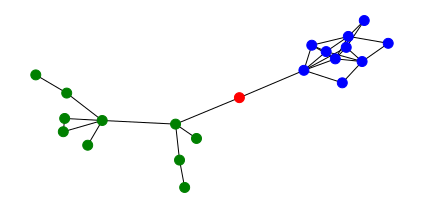

In [15]:
%config InlineBackend.figure_format = 'svg'

#%matplotlib widget
import matplotlib
import matplotlib.pyplot as plt
from networkx import nx

# Set default figure size:
matplotlib.rc('figure', figsize=(6, 3))

# Prevent 'Figure 1' from showing:
fig = plt.figure()
fig.canvas.header_visible = False
# Tweak ipympl UI:
fig.canvas.toolbar_visible = False
fig.canvas.footer_visible = False
fig.canvas.resizable = False

# Generate some random graphs with fixed numbers of nodes:
n = 10

# Generate a connected graph:
G = nx.connected_watts_strogatz_graph(n, 3, 0.5, seed=8)

# Add the bridge node:
G.add_node(n)

# Add another connected graph:
G2 = nx.connected_watts_strogatz_graph(n, 5, 0.5, seed=4)
G = nx.disjoint_union(G, G2)

# Link the bridge node to the two graphs:
G.add_edge(n,n-1)
G.add_edge(n,n+1)

# Colour the nodes accordingly:
nc = ['green']*n + ['red'] + ['blue']*n

# Layout and plot the graph:
pos = nx.spring_layout(G, seed=7) 
nx.draw_networkx_nodes(G,pos, node_size=100, node_color=nc)
nx.draw_networkx_edges(G,pos)
# This is helpful for debugging:
#nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

# Tune the plot:
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

# Make this figure available for use in other pages:
from myst_nb import glue
glue("digipres_network_bridge", fig, display=False)

Living across two worlds can be lonely. So above all else, you must find support, and be supported. Your managers will likely come from one of the two worlds, rather than growing up on the border, so may not understand the issues or perceive the risks.  If they can't help you defuse the dangers and fight the loneliness, they do not deserve your labour. 

But if you are given the support you need to be able to reach out, you'll find you are not alone.


## Kin

Many different organisations now recognise the importance of digital preservation, so while you may work in a team of only one or two individuals, there are other small teams in other organisations battling very similar problems.

They are your kin.

They likely operate in different contexts, with different goals and constraints.  But like you, they are go-betweens. They are bilingual. They are learning as they go. They are finding common ground. Just like you.  

If you can meet these like minds, you can help each other. But you'll have to put in the work.

### Meeting Places

As the [Wikipedia list of digital preservation initiatives](https://en.wikipedia.org/wiki/List_of_digital_preservation_initiatives) shows, there are a _lot_ of potential meeting places.   Here, we briefly introduce some of the major ones, but this cannot and should not be considered an exaustive list.  One of the things you'll need to work on is researching them to find out which ones might work best for you.

#### Conferences & Coalitions

One of the best ways to meet your #digipres peers is through the projects and events run by the various national and international organisations that have been set up to facilitate wider collaboration.  

Both the [Digital Preservation Coalition (DPC)](https://www.dpconline.org/) and the U.S. [National Digital Stewardship Alliance (NDSA)](http://www.digitalpreservation.gov/ndsa/) but a lot of work into supporting the digital preservation community.  They are both membership-based organisations, but make a lot of their work openly available.

There are also a number of initiatives supporting specific areas of interest, including:

- The [Open Preservation Foundation](https://openpreservation.org/) with is a strong focus on supporting open source tools used in digital preservation.
- The [International Internet Preservation Consortium](https://netpreserve.org/), focussed on web archiving both as a means and a target of digital preservation.
- The [BitCurator Consortium](https://bitcurator.net/bitcurator-consortium/), supporting the use of open source digital forensics tools for preservation purposes.
- The [Software Heritage](https://www.softwareheritage.org/) initiative in collaboration with [UNESCO](https://en.unesco.org/themes/information-preservation).
- The [No Time To Wait](https://mediaarea.net/NoTimeToWait) conference series, focusing on audiovisual preservation.

The largest digital preservation conference is [iPres](https://ipres-conference.org/). This is a good place to meet peers, but you should also look out for digital preservation tracks in conferences more closely related to your particular situation.


#### The #digipres Community

Outside of the formal venues, there is a wider community of digital preservation practitioners who are keen to help support each other.

For those able to work in the open and with a public profile, Twitter is a good option.  The [@digipresnews](https://twitter.com/digipresnews) account was set up to ensure important digital preservation blogs have a presence on Twitter, and as such, [the list of @digipresnews followers](https://twitter.com/digipresnews/followers) is a reasonable starting point.[^dpn] Another approach is to wander through the [#digipres](https://twitter.com/search?q=%23digipres) or [#DigitalPreservation](https://twitter.com/search?q=%23DigitalPreservation) hashtag feeds, or start with [this DigiPres Twitter List](https://twitter.com/i/lists/98975653) by [David Underdown](https://twitter.com/DavidUnderdown9).

If tweets won't cut the mustard, there are a number of mailing lists that might be able to help. The [JISC Digital Preservation Mailing List](https://www.jiscmail.ac.uk/cgi-bin/webadmin?A0=DIGITAL-PRESERVATION) is the main one, but as above, there are often more domain-specific lists that might be better depending on the question and the context (e.g. [Research Data Management](https://www.jiscmail.ac.uk/cgi-bin/webadmin?A0=RESEARCH-DATAMAN), [Web Archiving](https://netpreserve.org/about-us/iipc-mailing-list/), [Digital Curation](https://groups.google.com/g/digital-curation), etc.)

Although Twitter and mailing lists are good places to ask questions, it's not always easy to find out if you question has already been answered before, or to improve the answers over time.  This realisation lead to the creation of the [Digital Preservation Questions & Answers](https://qanda.digipres.org/), which was set up by some members of the #digipres community as a place to pool these useful tidbits over time.

This idea also: [digipres.org](https://www.digipres.org/)


[^dpn]: But [@digipresnews was set up by me](http://anjackson.github.io/keeping-codes/practice/DigiPresNews.html), so take an appropriate pinch of salt!


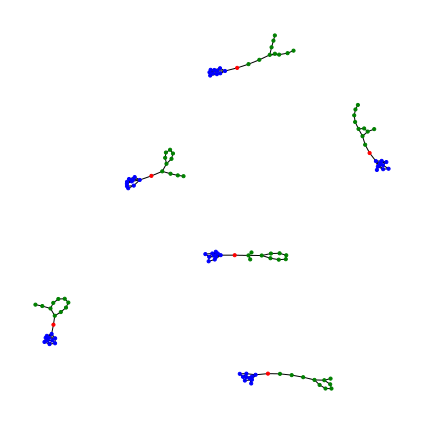

In [16]:
#%matplotlib widget
import matplotlib
import matplotlib.pyplot as plt
from networkx import nx

# Set default figure size:
matplotlib.rc('figure', figsize=(6, 6))

# Generate some random graphs:
def plot_multiple_groups(groups = 6, node_i = 10, link_links = False):
    # Prevent 'Figure 1' from showing:
    fig = plt.figure()
    fig.canvas.header_visible = False
    # Tweak ipympl UI:
    fig.canvas.toolbar_visible = False
    fig.canvas.footer_visible = False
    fig.canvas.resizable = False

    # Accumulate the graph here:
    G = None
    nc = []

    # Generate multiple groups:
    for loop in range(groups):
        # Generate a connected graph:
        G1 = nx.connected_watts_strogatz_graph(node_i, 3, 0.5)

        # Add the bridge node:
        link_node = node_i
        G1.add_node(link_node)

        # Add another connected graph:
        G2 = nx.connected_watts_strogatz_graph(node_i, 5, 0.5)
        G1 = nx.disjoint_union(G1, G2)

        # Link the bridge node to the two graphs:
        G1.add_edge(link_node,link_node - 1)
        G1.add_edge(link_node,link_node + 1)

        # Merge all the Gs
        if G:
            G = nx.disjoint_union(G, G1)
        else:
            G = G1

        # Colour the nodes accordingly:
        nc = nc + ['green']*node_i + ['red'] + ['blue']*node_i

    # Nodes in each group:
    group_nodes = 2*node_i + 1

    # Link up the linkers (if needed)
    if link_links:
        for loop in range(groups - 1):
            G.add_edge(loop*group_nodes + node_i, (loop+1)*group_nodes + node_i)

    # Layout and plot the graph:
    pos = nx.spring_layout(G, iterations=200, seed=8) 
    nx.draw_networkx_nodes(G,pos, node_size=10, node_color=nc)
    nx.draw_networkx_edges(G,pos)
    # This is helpful for debugging:
    #nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

    # Tune the plot:
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_multiple_groups()


## Guide Books

There are already a number of good guides to digital preservation in general. In particular, for those with a background in cultural heritage, I would recommend:

- [DPCs Digital Preservation Handbook](https://www.dpconline.org/handbook)
- [The Theory and Craft of Digital Preservation](https://jhupbooks.press.jhu.edu/title/theory-and-craft-digital-preservation) by [Trevor Owens](http://www.trevorowens.org/), to position digital preservation in the wider cultural heritage context and to provide a concrete framework for making progress ([see here for the open access version](https://osf.io/preprints/lissa/5cpjt/)).
- [Ashley Blewer's](https://ashleyblewer.com/) [training slide decks](https://training.ashleyblewer.com/), for an introduction to the main concepts and pointers.
- The [Wikipedia page on digital preservation](https://en.wikipedia.org/wiki/Digital_preservation).

Curiously, there does not seem to be many equivalent publications for those coming to digital preservation from the information technology side -- even if you know a lot about IT, digital preservation requirements can be seem strange at first!

Having said that, Ashley Blewer's [slides on Digital Preservation](https://training.ashleyblewer.com/presentations/digital-preservation.html#2) and related subjects (e.g. [OAIS](https://training.ashleyblewer.com/presentations/oais.html#2) and [Fixity](https://training.ashleyblewer.com/presentations/fixity.html#2)) are a good introduction to some of the key terminology.

To complement these broader works, the goal here is to focus on specific issues that deserve more detailed exploration, and to look for common patterns and practices across a broad range of situations and contexts. 

## The Bad News

Underfunded. Embattled. lack of nuance-clarity.

- Web archiving
- Digital curation
- Digital scholarship
- Digitization
- Digital Heritage
- 

### The Trap

Tension between getting started and building on other's work.

**n.b. add something on Vocational Awe** [Vocational Awe and Librarianship: The Lies We Tell Ourselves](http://www.inthelibrarywiththeleadpipe.org/2018/vocational-awe/)



### Opportunities

## Allies

One of my favourite digital preservation stories is: [It Takes a Village to Save a Hard Drive](https://web.archive.org/web/20130916000537/http://notepad.benfinoradin.info/2013/09/12/it-takes-a-village-to-save-a-hard-drive) -- it's a perfect illustration of what 

["XFR STN"](https://www.newmuseum.org/exhibitions/view/xfr-stn) (Transfer Station), an open-door artist-centred media archiving project.



- software heritage archive
- [sustaining software effort.](http://www.software.ac.uk/SustainingSoftware.html)  

## All Of Us


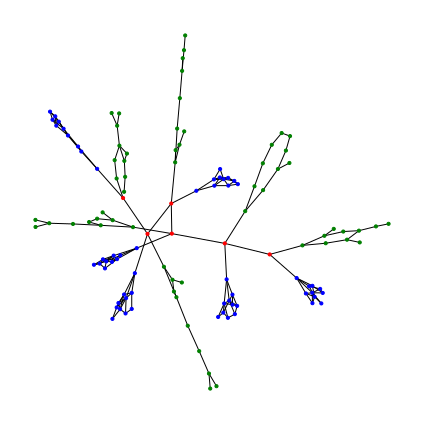

In [17]:
plot_multiple_groups(link_links=True)